In [1]:
# import jupyter notebook magic to show plots and automatically load modules
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
# import python packages for solving the problem
import pandas as pd
import math
import numpy as np
from datetime import datetime
import os 
import sys
from ast import literal_eval

import seaborn as sns
import matplotlib.pyplot as plt

#import customized modules
src_dir = os.path.abspath(os.path.join(os.pardir, 'src'))
sys.path[0] = src_dir
from modules import *

In [3]:
# file names of the data
cta_entry_fname = '../data/CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv'
cta_station_fname = '../data/CTA_-_System_Information_-_List_of__L__Stops.csv'

In [4]:
# read data into data frames
df_cta_entry = pd.read_csv(cta_entry_fname)
# convert the date in string to datetime
df_cta_entry['date'] = df_cta_entry.date.apply(lambda x: str_to_date(x))
df_cta_station = pd.read_csv(cta_station_fname)

In [5]:
# rename columns of the data frame for easier access
df_cta_station.columns = df_cta_station.columns.str.lower().str.replace(' ', '_')

In [6]:
df_cta_entry.daytype.unique()

array(['U', 'W', 'A'], dtype=object)

# HIghest average ridership

Find the top 5 stations with the highest average ridership per day.

In [7]:
# group each ride by each station, and calculate the mean
day_type = ['W']
df_rides = df_cta_entry[df_cta_entry.daytype.isin(day_type)]
df_rides = pd.DataFrame(df_rides.groupby(['stationname']).rides.mean())
# sort the station in order of highest mean to lowest mean per day
df_rides = df_rides.sort_values('rides', ascending=False)
# station withe the highest mean is the first station
highest_mean = pd.DataFrame(df_rides.iloc[:5]).reset_index()

In [8]:
highest_mean

,stationname,rides
0,Clark/Lake,18052.295759
1,Lake/State,16328.424083
2,Chicago/State,14196.820918
3,95th/Dan Ryan,12459.540141
4,Fullerton,11811.760053


In [9]:
df_rides_per_day = df_cta_entry[df_cta_entry['stationname'].isin(highest_mean.stationname)
                               & (df_cta_entry.daytype.isin(day_type))]

### Plot for the average ridership for each station in descending order

95th/Dan Ryan
 
-0.7441 x + 1.488e+04
Chicago/State
 
0.4116 x + 1.286e+04
Clark/Lake
 
1.151 x + 1.431e+04
Fullerton
 
0.5129 x + 1.014e+04
Lake/State
 
1.95 x + 9984


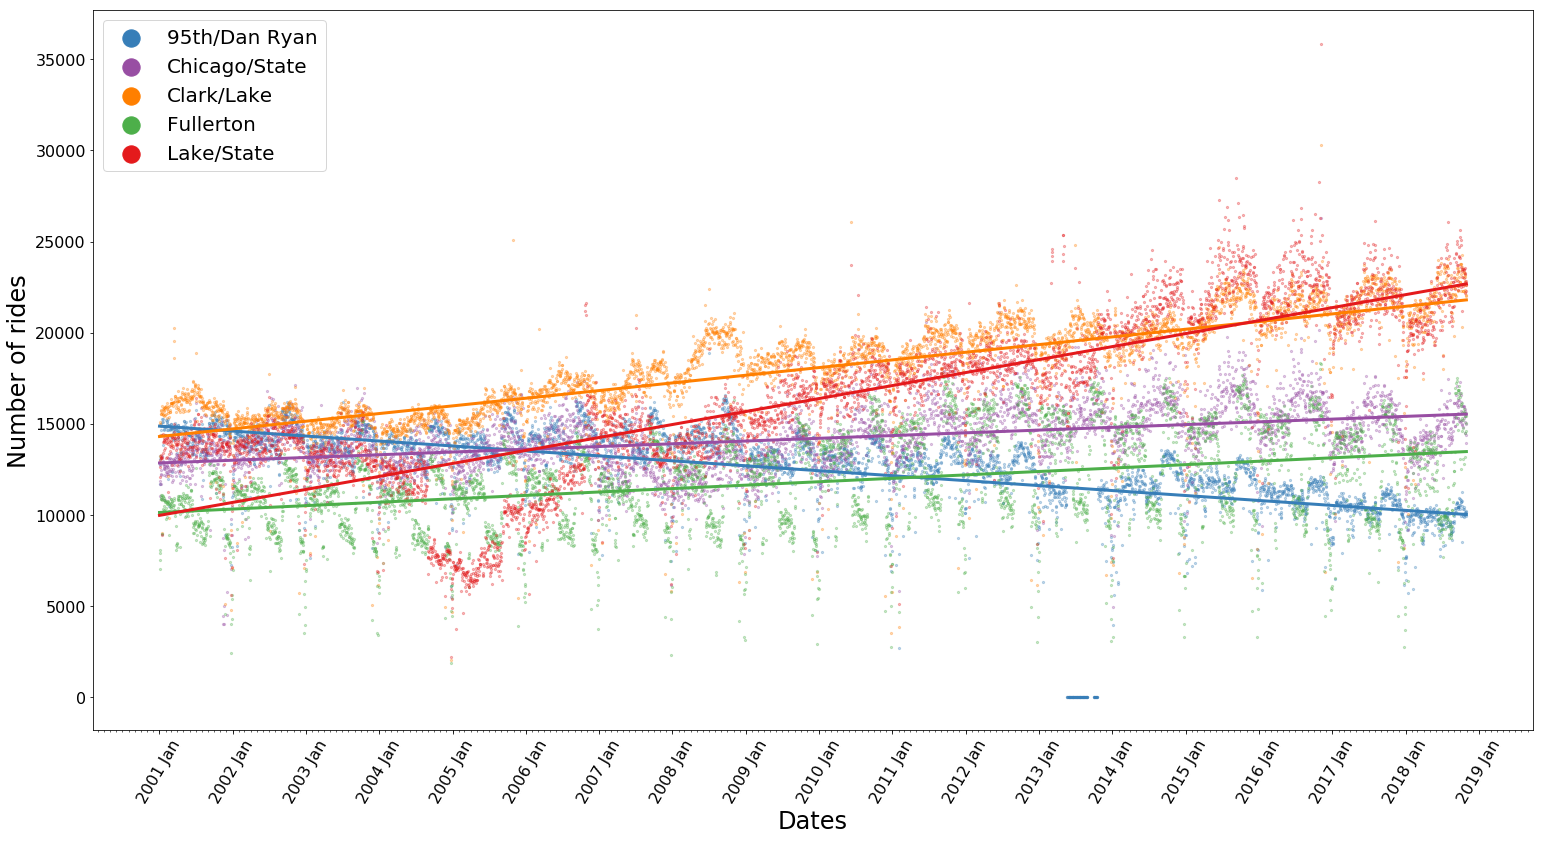

In [187]:
from matplotlib import dates

color_dict = dict(zip(list(df_rides_per_day.stationname.unique()), ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00']))
fig = plt.figure(figsize=(20, 10))
ax = fig.add_axes([0,0,1,1])
for i, group in df_rides_per_day.groupby('stationname'):
    x = group.date - group.date.iloc[0]
    x = [t.days for t in x]
    fit = np.polyfit(x, group.rides, 1)
    fit_fn = np.poly1d(fit)
    ax.scatter(group.date, group.rides, label=i,color=color_dict[i], s=5, alpha=0.3)
    ax.plot(group.date, fit_fn(x), ls='-', color=color_dict[i], lw=3)
    print(i)
    print(fit_fn)

fontsize=16
for item in ax.get_xticklabels():
    item.set_rotation(60)
    item.set_fontsize(fontsize)
for item in ax.get_yticklabels():
    item.set_fontsize(fontsize)
#figure style
ax.set_xlabel('Dates', fontsize=1.5*fontsize)
# ax.set_xticklabels(df_rides_per_day.date, fontsize=0.8*fontsize)
#set major ticks every year and minor ticks every month
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())
#set major ticks format
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
ax.set_ylabel('Number of rides', fontsize=1.5*fontsize)
#plot legend
# Plot legend.
lgnd = ax.legend(loc="upper left", numpoints=1, fontsize=20)
for handle in lgnd.legendHandles:
    handle.set_sizes([300.0])
    handle.set_alpha(1)
fig.savefig('../result/highest_station_ridership_{}_trend.png'.format(''.join(day_type)), transparent=True,bbox_inches='tight' )

In [ ]:
fig, ax1 = plt.subplots(figsize=(20, 10))
df_test = df_rides_per_day[df_rides_per_day.date > pd.Timestamp('2016-01-01 00:00:00')]
sns.scatterplot(x='date', y='rides', hue='stationname', data=df_test, ax=ax1, s=10)
for item in ax1.get_xticklabels():
    item.set_rotation(60)
#figure style
fontsize=16
ax1.set_xlabel('Dates', fontsize=1.5*fontsize)
ax1.set_xlim([pd.Timestamp('2016-01-01 00:00:00'), pd.Timestamp('2019-01-01 00:00:00')])
# ax.set_xticklabels(df_rides_per_day.date, fontsize=0.8*fontsize)
#set major ticks every year and minor ticks every month
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_minor_locator(mdates.MonthLocator())
#set major ticks format
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y %b'))
ax1.set_ylabel('Number of rides', fontsize=1.5*fontsize)
fig.savefig('../result/highest_station_ridership_2016-2018_{}.png'.format(''.join(day_type)), transparent=True,bbox_inches='tight' )

In [ ]:
df_rides_per_day['month'] = df_rides_per_day.date.apply(lambda x: x.month)
for i, group in df_rides_per_day.groupby('stationname'):
    fig, ax = plt.subplots()
    ax.set_title(i)
    sns.barplot(x='month', y='rides', data=group, ax=ax)

In [ ]:
pd.Grouper